In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import GridSearchCV

In [15]:
data=pd.read_csv('Hotel Reservations.csv')
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


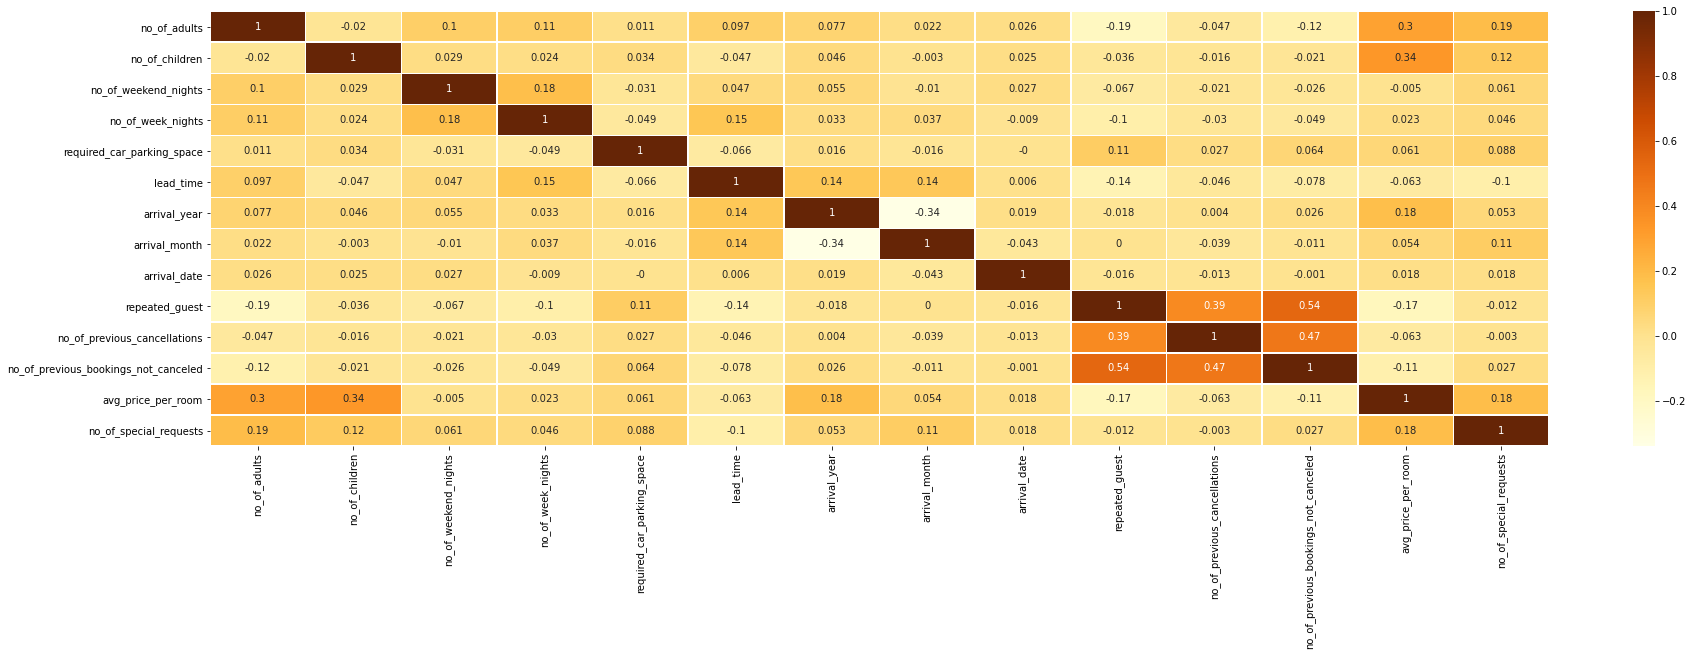

In [27]:
correlation=data.corr().round(3)
plt.figure(figsize=(30,8))
sns.heatmap(correlation,annot=True,cmap="YlOrBr",linewidth=.5);

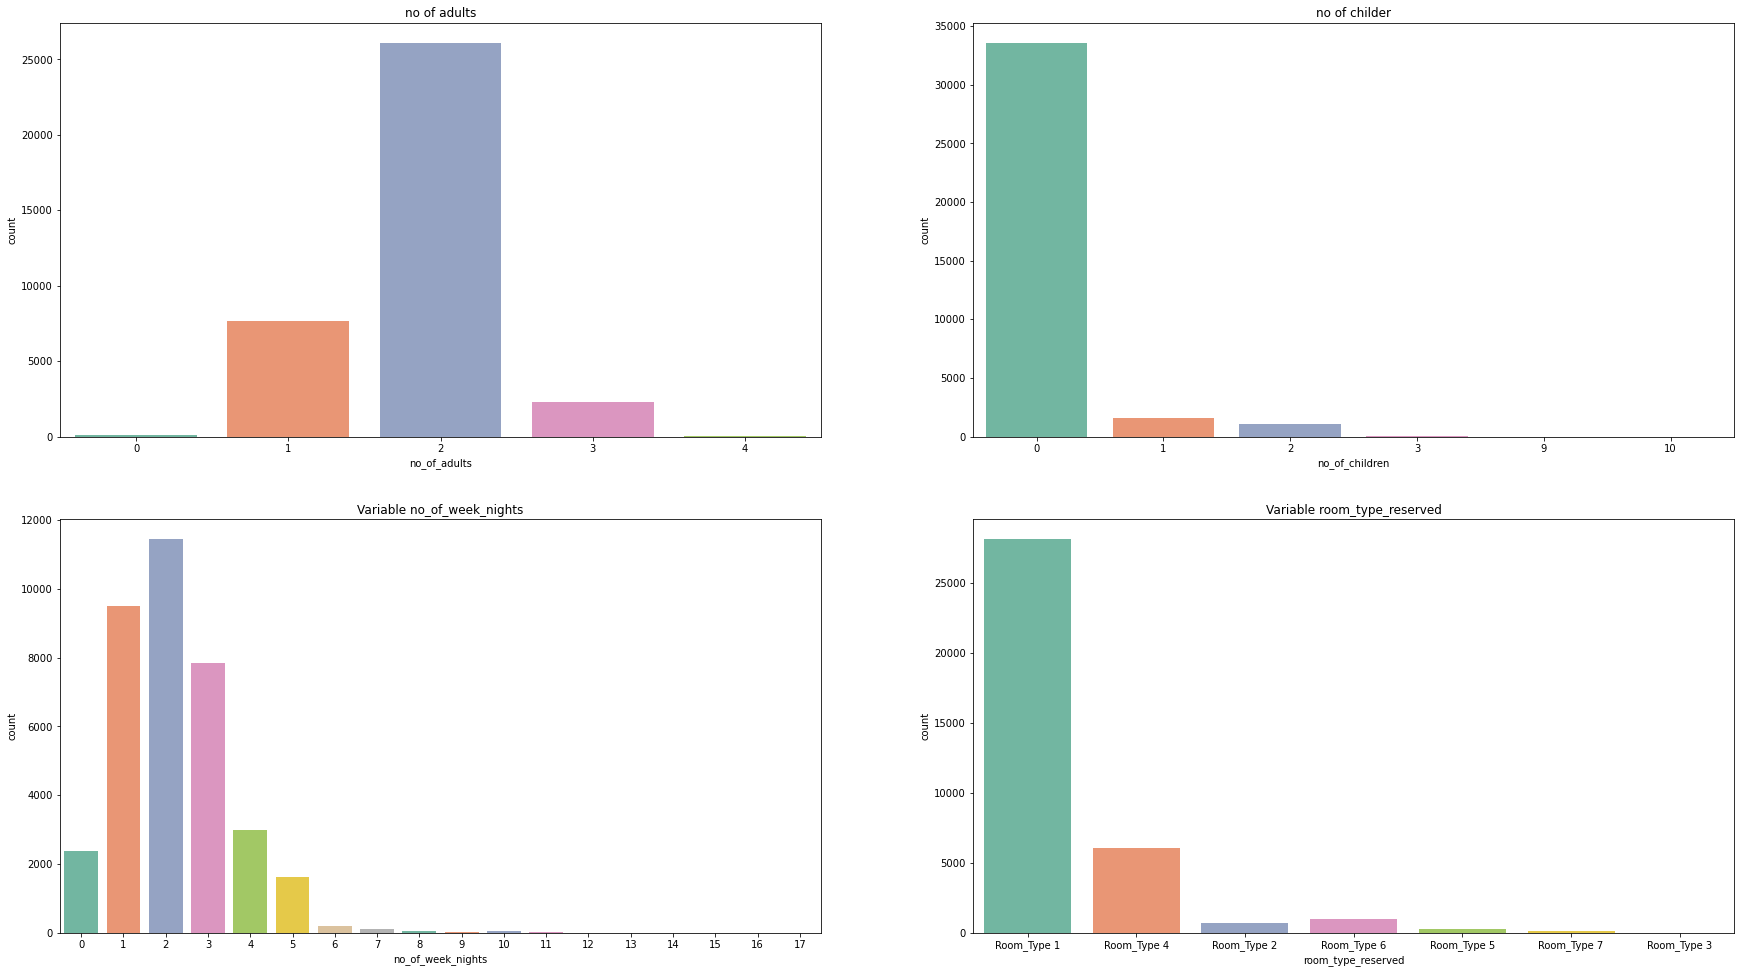

In [45]:
plt.figure(figsize=(30,35))
plt.subplot(4,2,1)
plt.gca().set_title("no of adults")
sns.countplot(x="no_of_adults",palette='Set2',data=data)

plt.subplot(4,2,2)
plt.gca().set_title("no of childer")
sns.countplot(x="no_of_children",palette='Set2',data=data)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = data)

plt.subplot(4,2,4)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = data)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

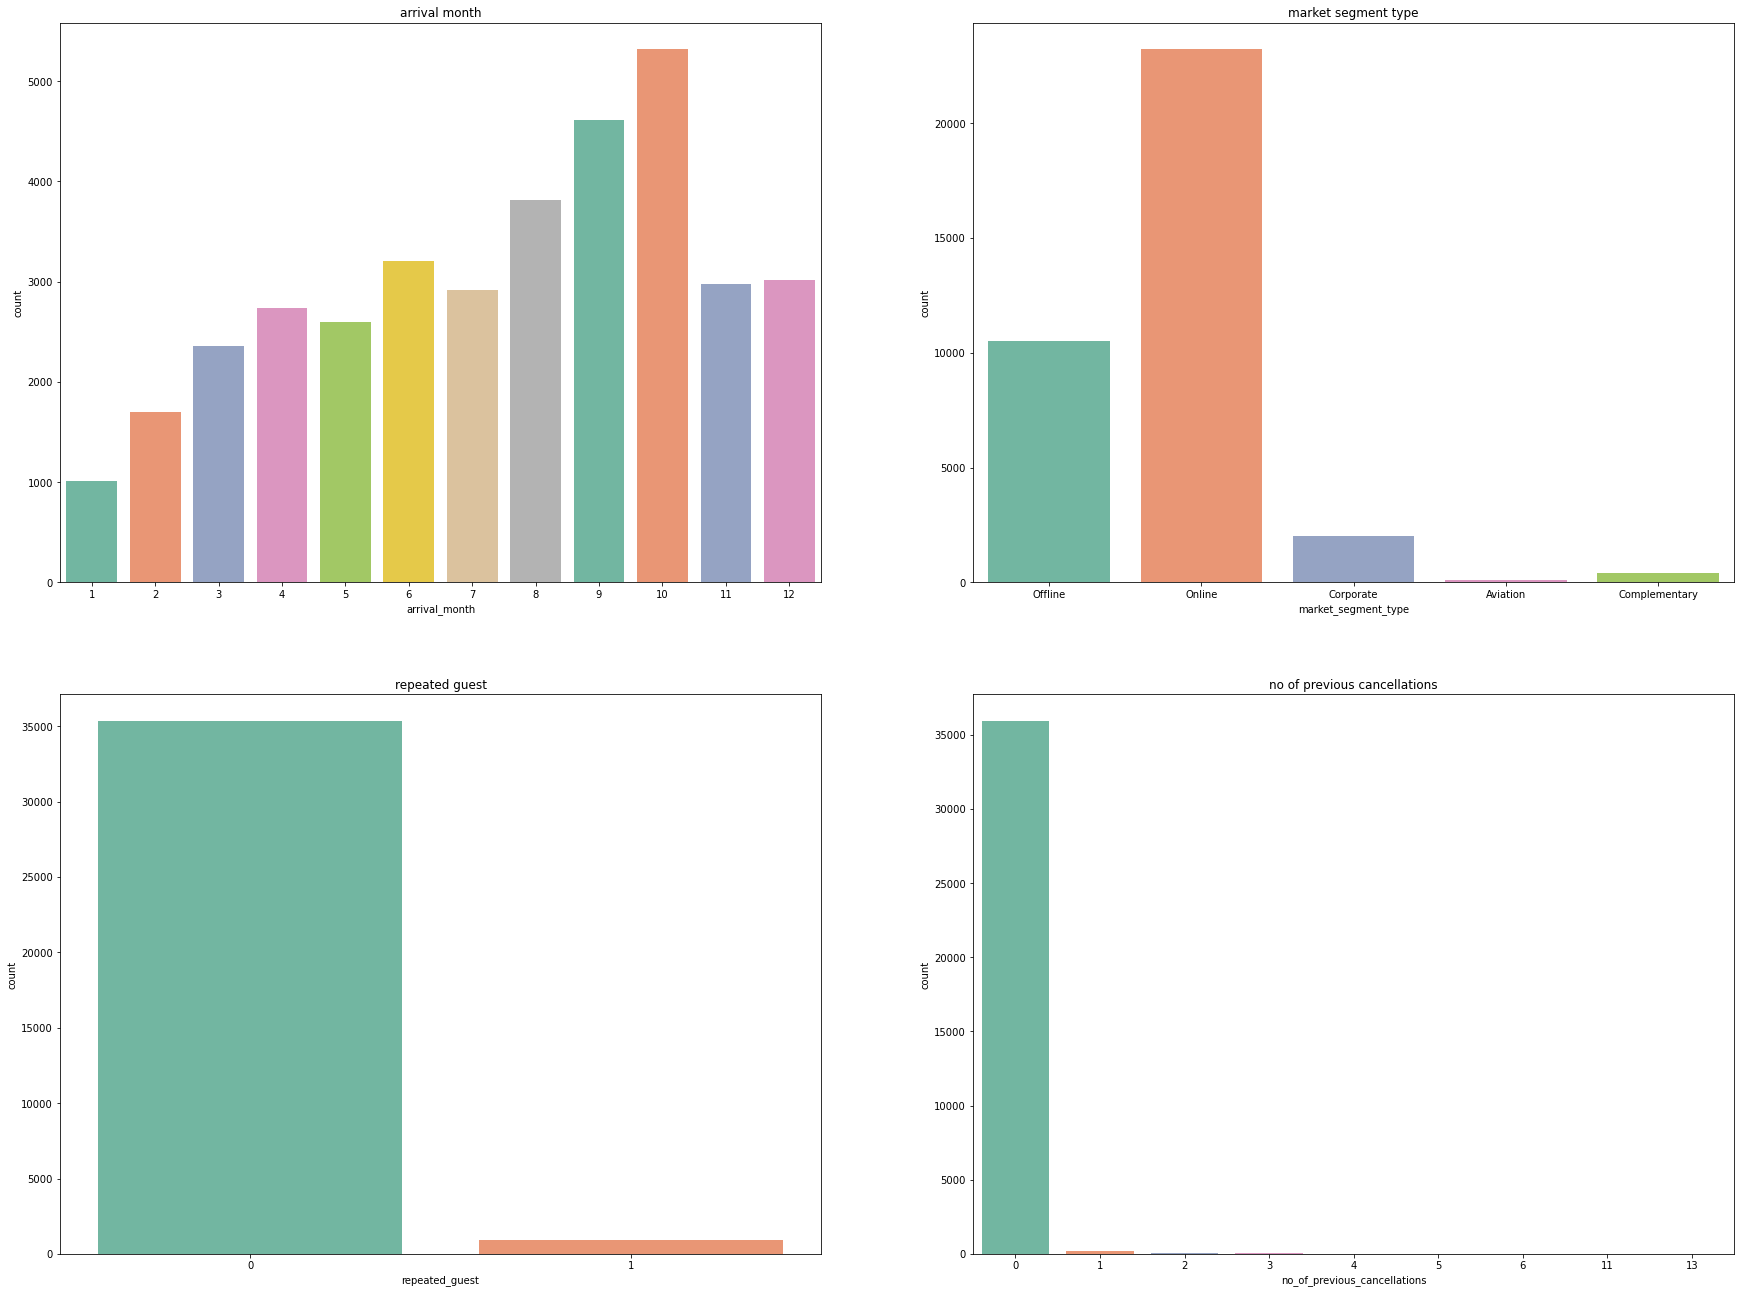

In [46]:
plt.figure(figsize=(30,35))


plt.subplot(3,2,1)
plt.gca().set_title("arrival month")
sns.countplot("arrival_month",palette="Set2",data=data)

plt.subplot(3,2,2)
plt.gca().set_title("market segment type")
sns.countplot("market_segment_type",palette="Set2",data=data)

plt.subplot(3,2,3)
plt.gca().set_title("repeated guest")
sns.countplot("repeated_guest",palette="Set2",data=data)

plt.subplot(3,2,4)
plt.gca().set_title("no of previous cancellations")
sns.countplot("no_of_previous_cancellations",palette="Set2",data=data)

plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


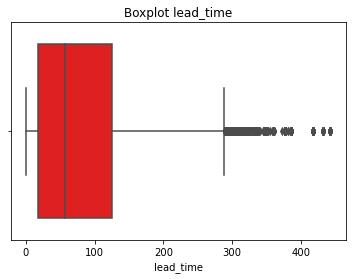

In [50]:
plt.title("Boxplot lead_time")
sns.boxplot(data["lead_time"],color="red")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


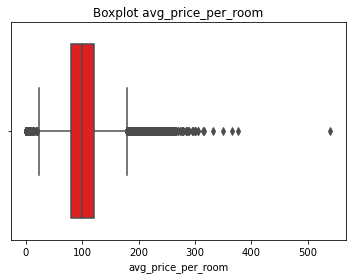

In [51]:
plt.title("Boxplot avg_price_per_room")
sns.boxplot(data["avg_price_per_room"],color="red")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-p

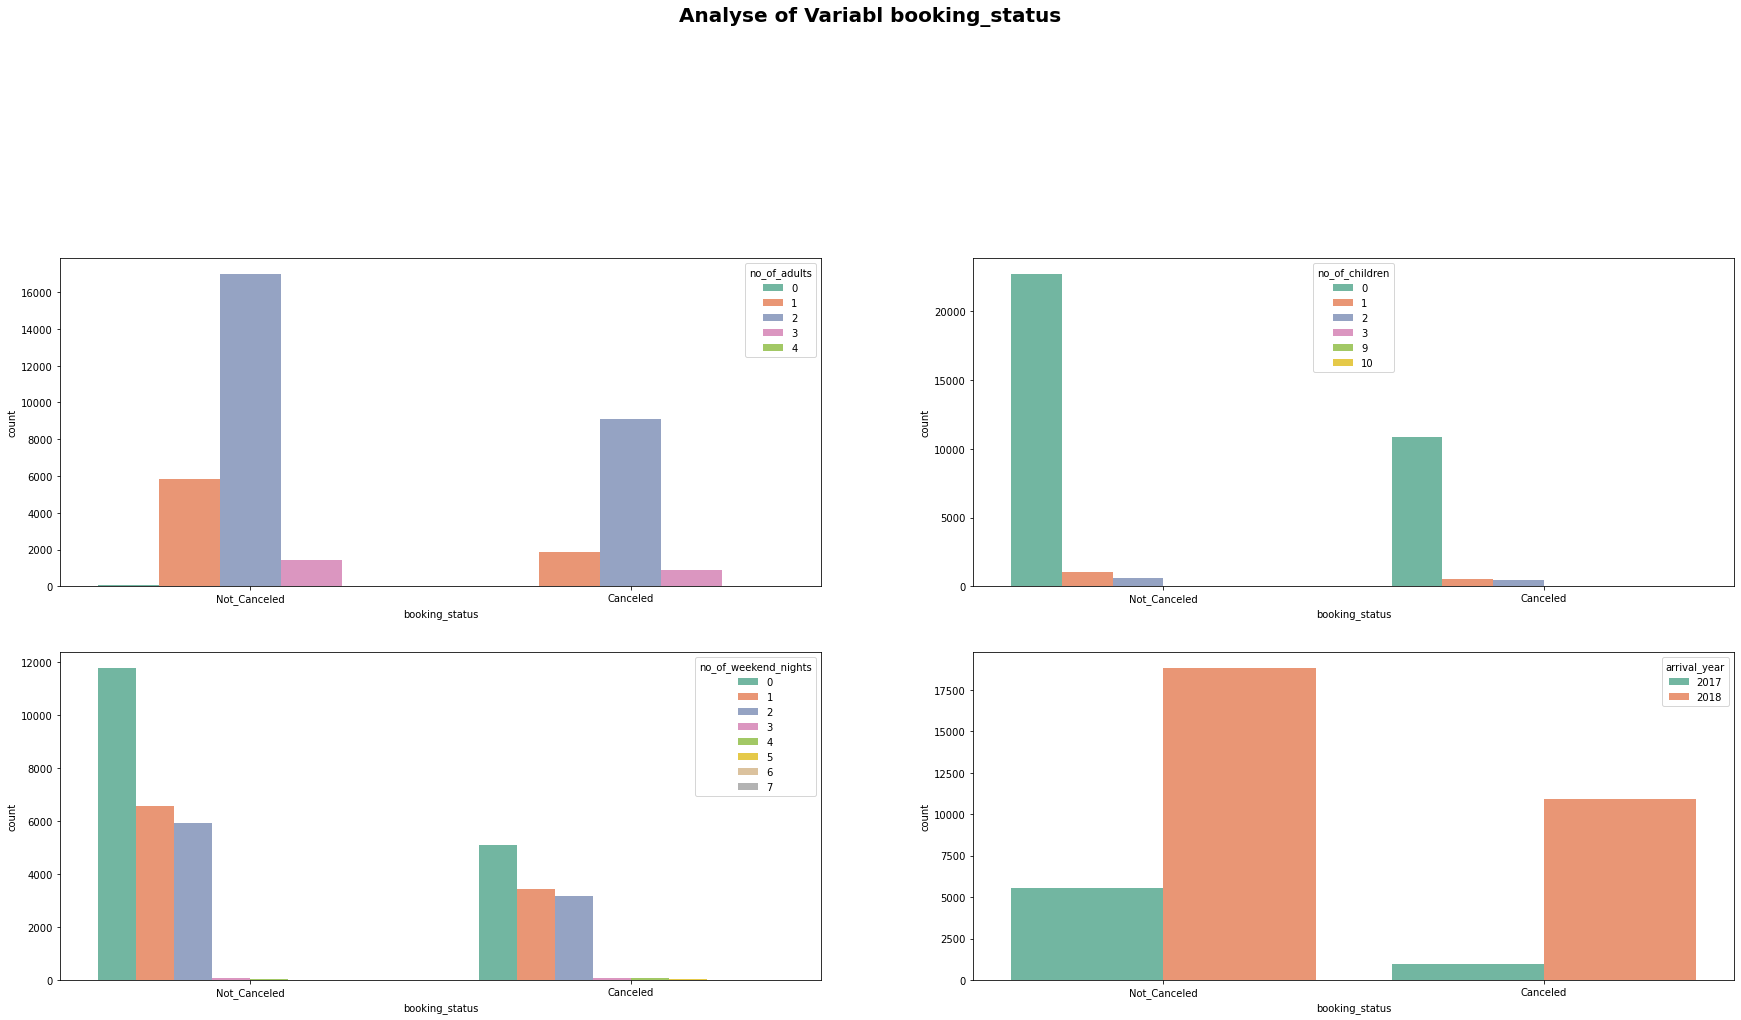

In [58]:
plt.figure(figsize=(30,35))
plt.suptitle('Analyse of Variabl booking_status',fontweight="bold",fontsize=20)

plt.subplot(5,2,1)
sns.countplot("booking_status",hue="no_of_adults",palette="Set2",data=data)

plt.subplot(5,2,2)
sns.countplot("booking_status",hue="no_of_children",palette="Set2",data=data)

plt.subplot(5,2,3)
sns.countplot("booking_status",hue="no_of_weekend_nights",palette="Set2",data=data)

plt.subplot(5,2,4)
sns.countplot("booking_status",hue="arrival_year",palette="Set2",data=data)
plt.show()

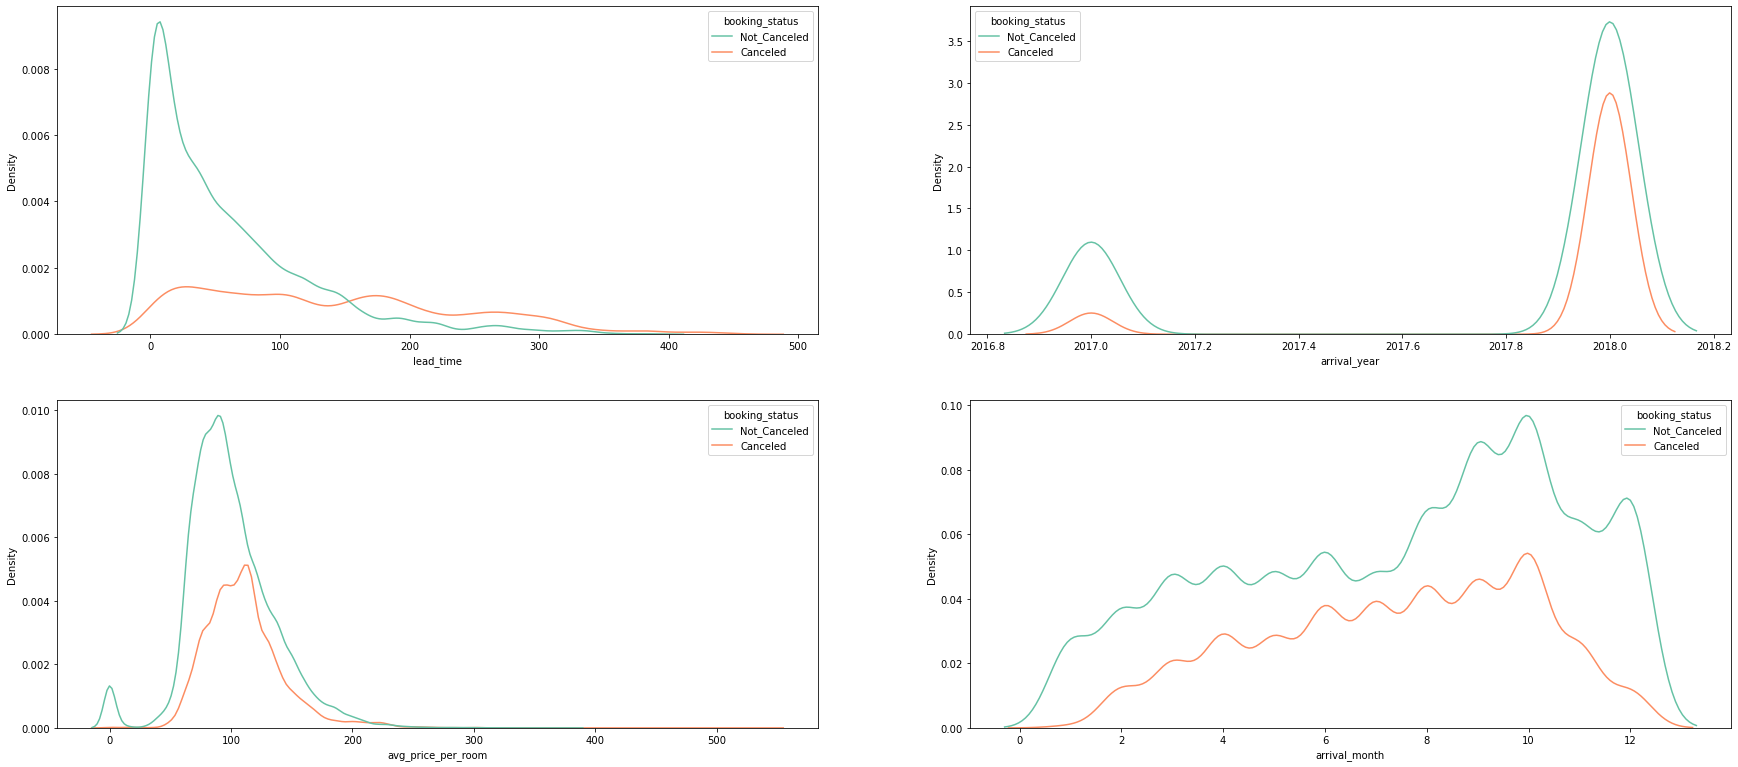

In [62]:
plt.figure(figsize=(30,35))

plt.subplot(5,2,1)
sns.kdeplot("lead_time",hue="booking_status",palette="Set2",data=data)

plt.subplot(5,2,2)
sns.kdeplot("arrival_year",hue="booking_status",palette="Set2",data=data)

plt.subplot(5,2,3)
sns.kdeplot("avg_price_per_room",hue="booking_status",palette="Set2",data=data)

plt.subplot(5,2,4)
sns.kdeplot("arrival_month",hue="booking_status",palette="Set2",data=data)

plt.show()



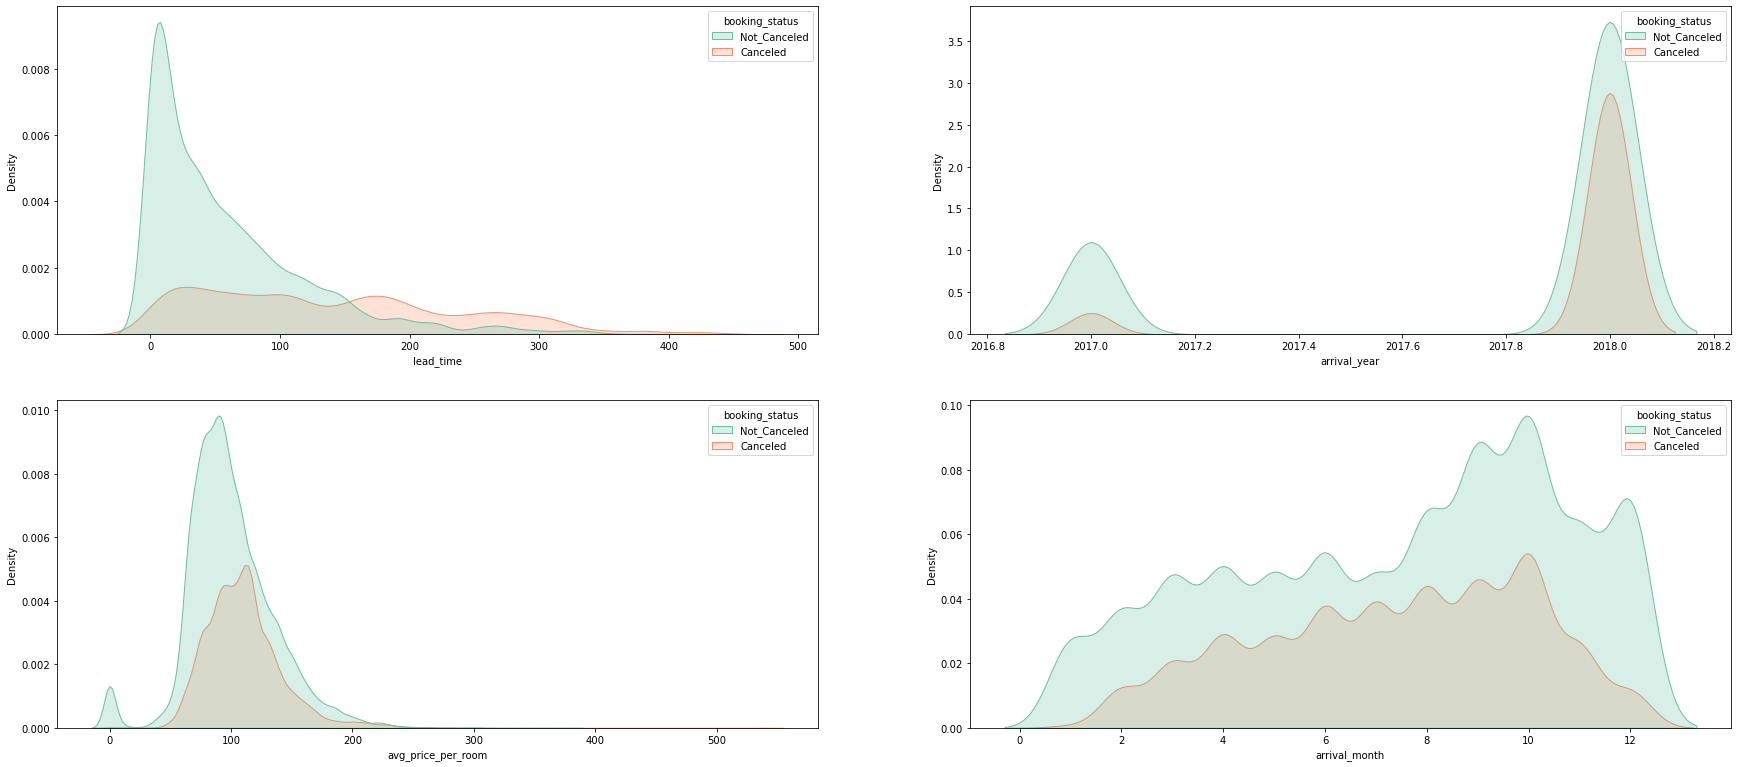

In [64]:
plt.figure(figsize=(30,35))

plt.subplot(5,2,1)
sns.kdeplot("lead_time",hue="booking_status",palette="Set2",shade=True,data=data)

plt.subplot(5,2,2)
sns.kdeplot("arrival_year",hue="booking_status",palette="Set2",shade=True,data=data)

plt.subplot(5,2,3)
sns.kdeplot("avg_price_per_room",hue="booking_status",palette="Set2",shade=True,data=data)

plt.subplot(5,2,4)
sns.kdeplot("arrival_month",hue="booking_status",palette="Set2",shade=True,data=data)

plt.show()



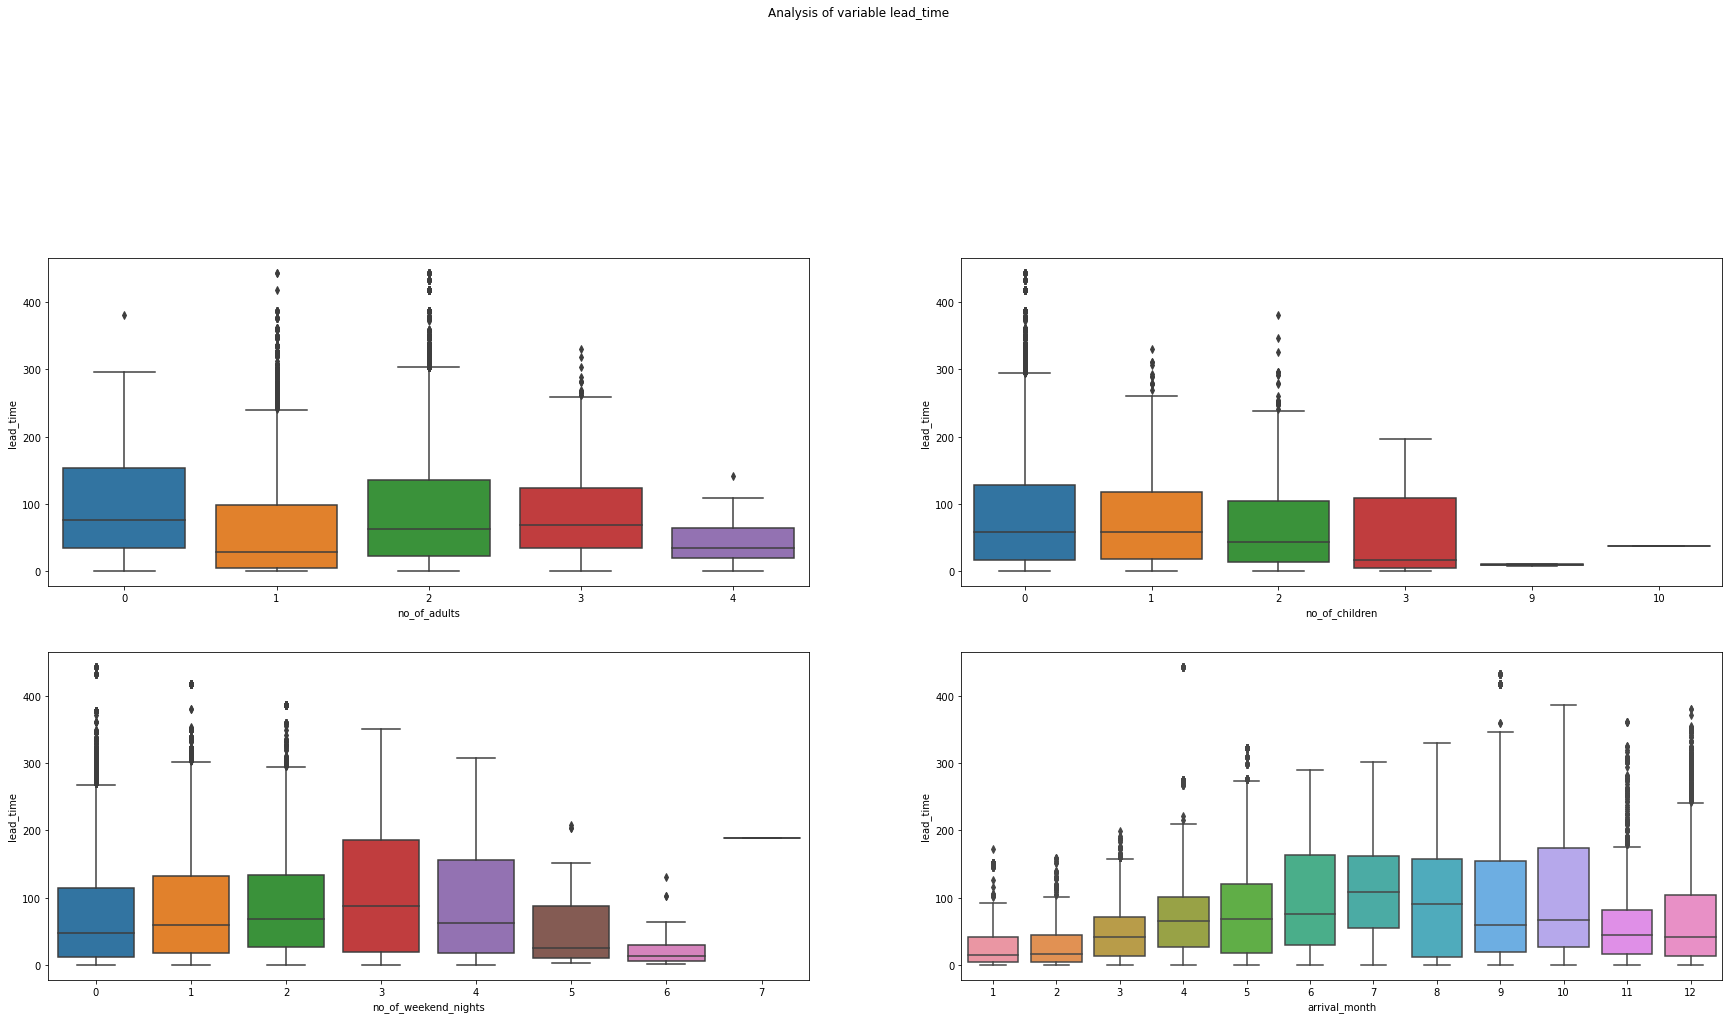

In [70]:
plt.figure(figsize=(30,35))
plt.suptitle('Analysis of variable lead_time')


plt.subplot(5,2,1)
sns.boxplot(x="no_of_adults",y="lead_time",data=data)

plt.subplot(5,2,2)
sns.boxplot(x="no_of_children",y="lead_time",data=data)

plt.subplot(5,2,3)
sns.boxplot(x="no_of_weekend_nights",y="lead_time",data=data)

plt.subplot(5,2,4)
sns.boxplot(x="arrival_month",y="lead_time",data=data)

plt.show()

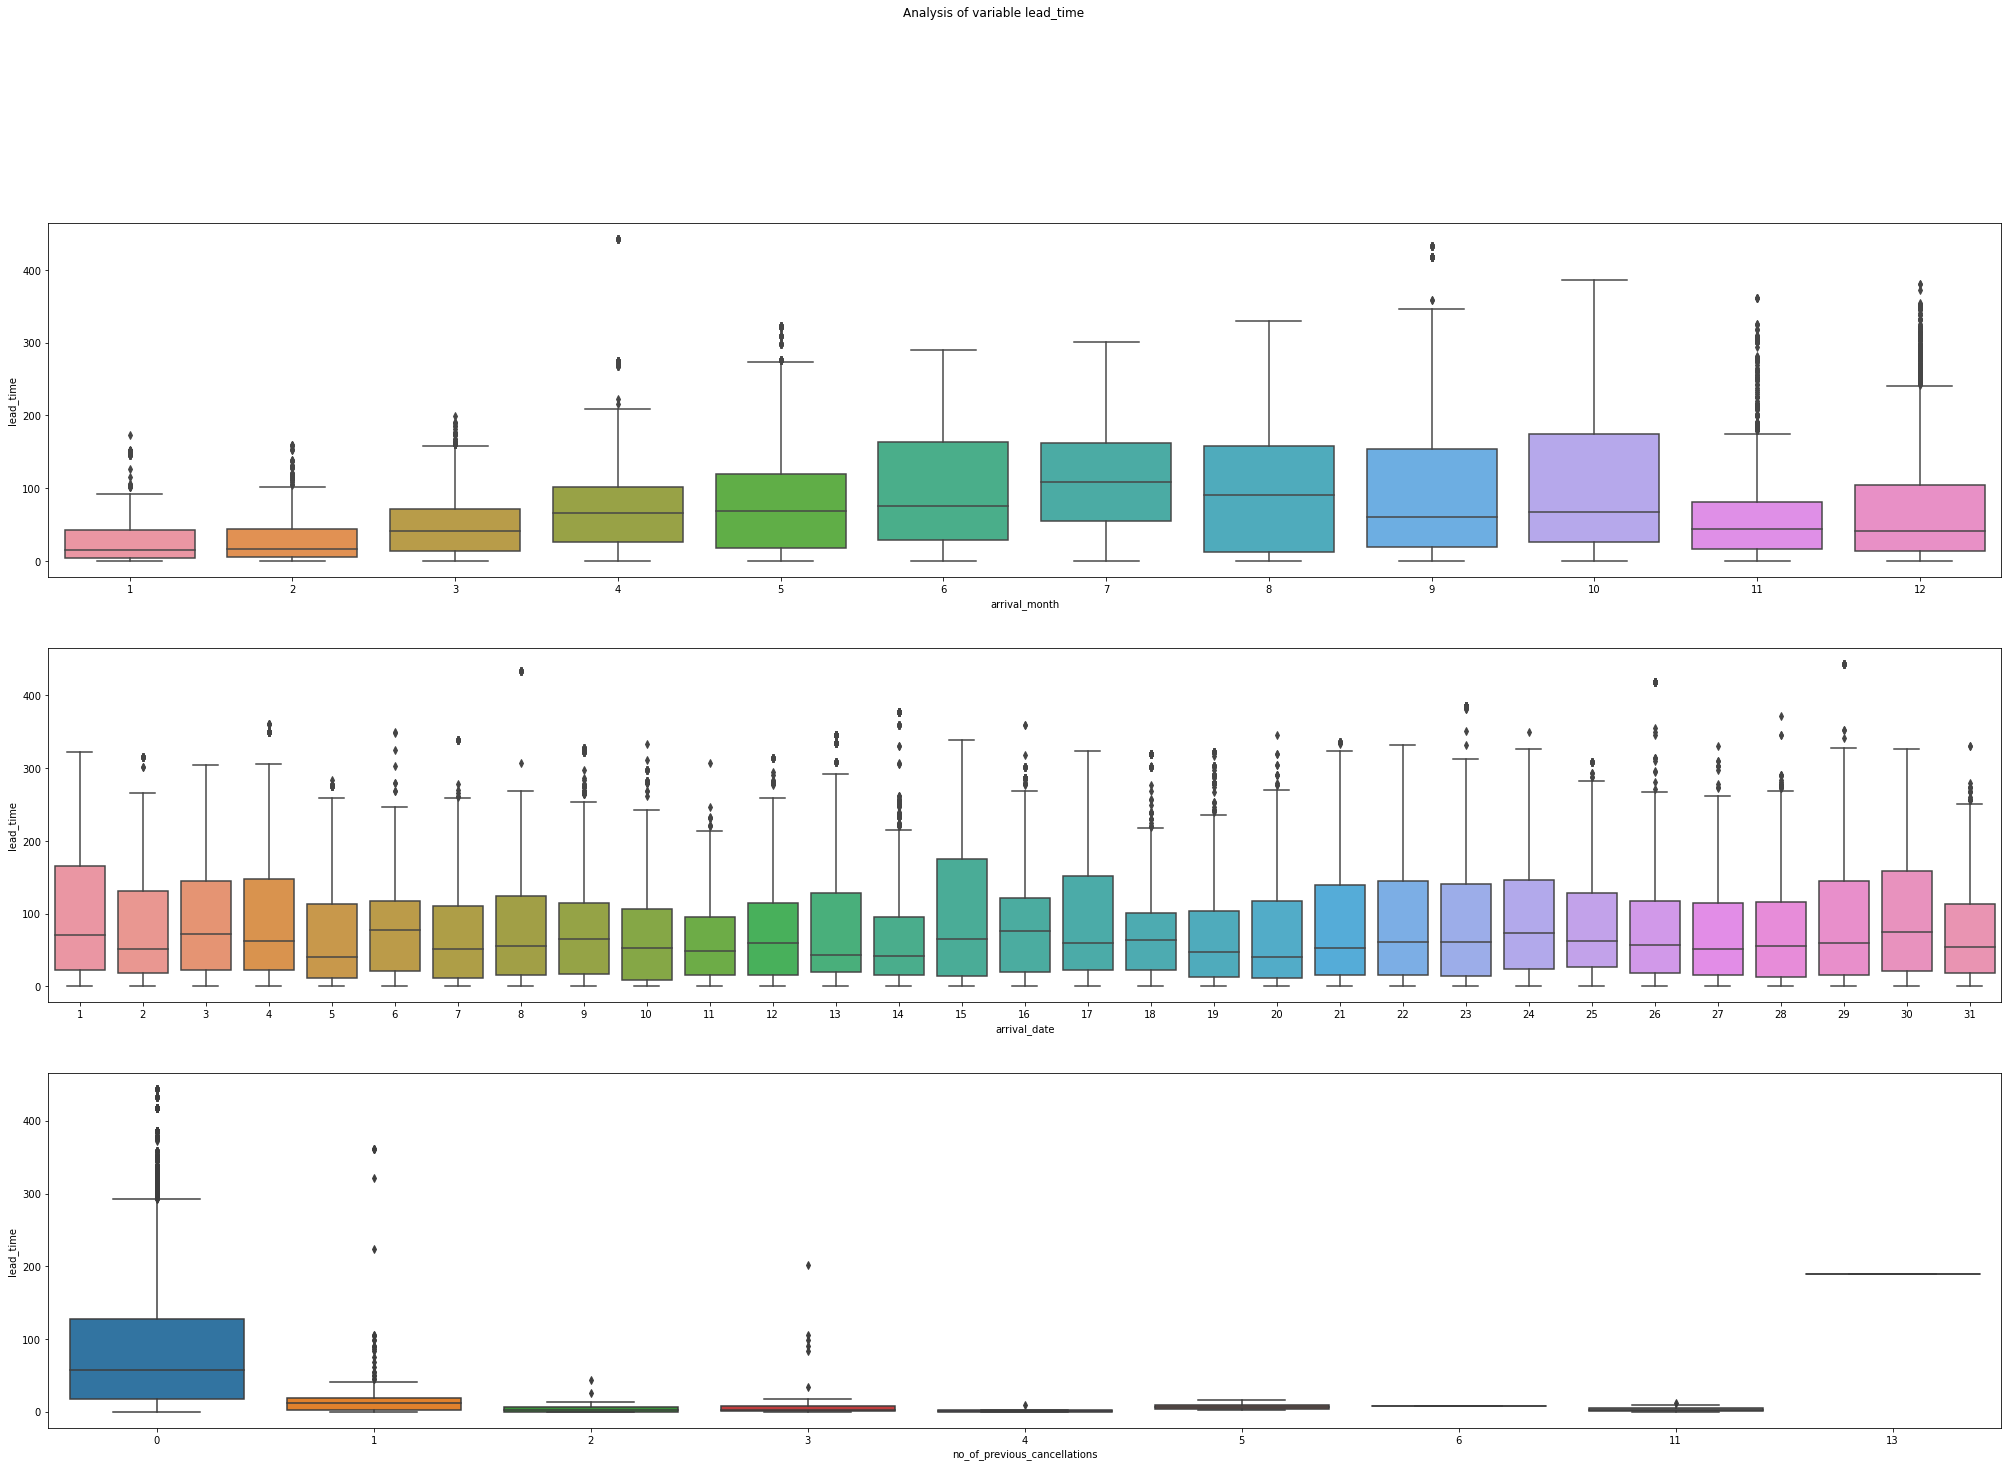

In [74]:
plt.figure(figsize=(35,30))
plt.suptitle("Analysis of variable lead_time")

plt.subplot(4,1,1)
sns.boxplot(x="arrival_month",y="lead_time",data=data)

plt.subplot(4,1,2)
sns.boxplot(x="arrival_date",y="lead_time",data=data)

plt.subplot(4,1,3)
sns.boxplot(x="no_of_previous_cancellations",y="lead_time",data=data);

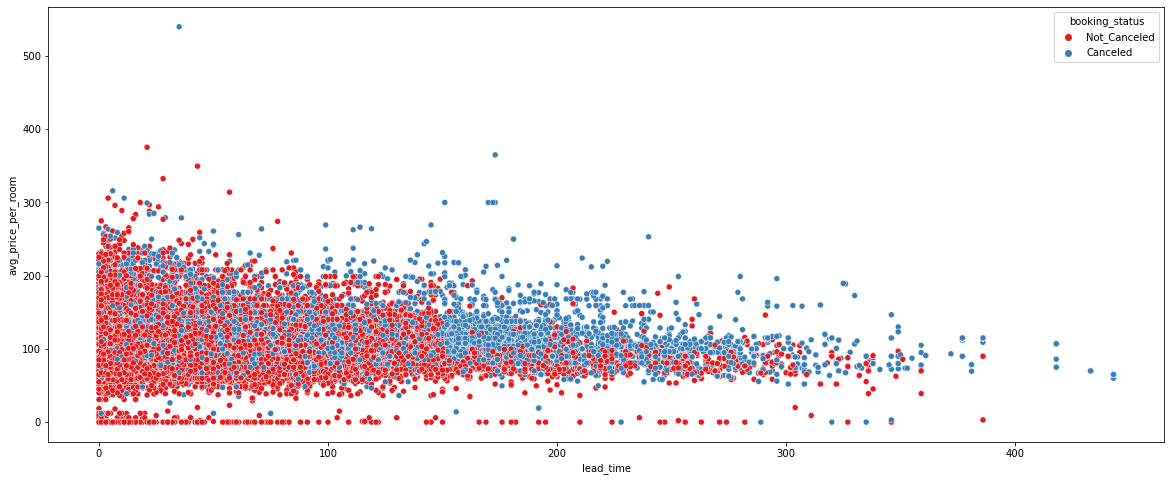

In [79]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=data,x="lead_time",y="avg_price_per_room",palette="Set1",hue="booking_status")
plt.show()

In [80]:
data=data.drop("Booking_ID",axis=1)

In [82]:
from sklearn.preprocessing import LabelEncoder

label_encoder_type_of_meal_plan = LabelEncoder()
label_encoder_room_type_reserved = LabelEncoder()
label_encoder_market_segment_type = LabelEncoder()
label_encoder_booking_status = LabelEncoder()

data['type_of_meal_plan'] = label_encoder_type_of_meal_plan.fit_transform(data['type_of_meal_plan'])
data['room_type_reserved'] = label_encoder_room_type_reserved.fit_transform(data['room_type_reserved'])
data['market_segment_type'] = label_encoder_market_segment_type.fit_transform(data['market_segment_type'])
data['booking_status'] = label_encoder_booking_status.fit_transform(data['booking_status'])

In [83]:
le_name_mapping = dict(zip(label_encoder_booking_status.classes_, label_encoder_booking_status.transform(label_encoder_booking_status.classes_)))

In [84]:
X=data.drop('booking_status',axis=1)
X=X.values
y=data['booking_status']

In [86]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [101]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2335,   66],
       [3902,  952]], dtype=int64)

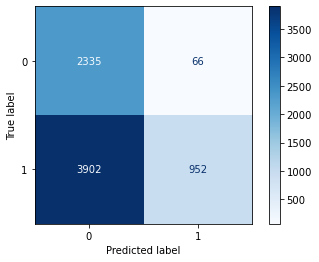

In [103]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(classifier, X_test, y_test, cmap=plt.cm.Blues)

In [106]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
#previsoes = decision_tree.predict(X_test)
y_pred = decision_tree.predict(X_test)
cm1 = confusion_matrix(y_test, y_pred)
cm1

array([[1901,  500],
       [ 383, 4471]], dtype=int64)

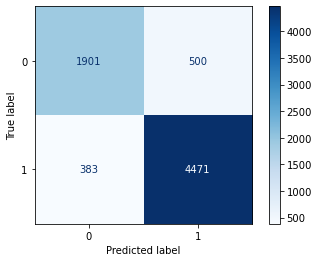

In [108]:
plot_confusion_matrix(decision_tree, X_test, y_test, cmap=plt.cm.Blues)

In [110]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)
cm2 = confusion_matrix(y_test, y_pred)
cm2

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1437,  964],
       [ 495, 4359]], dtype=int64)

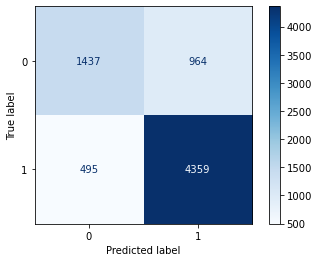

In [111]:
plot_confusion_matrix(logistic, X_test, y_test, cmap=plt.cm.Blues)